In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

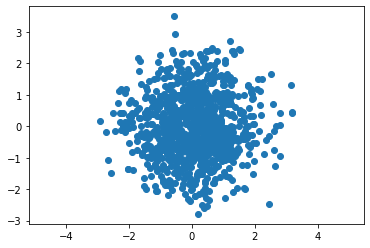

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math
from scipy.stats import norm

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

cov = np.array([[1, 0], [0, 1]]) 
mu = np.array([0,0]) 
r= np.random.multivariate_normal(mean=mu, cov=cov, size=1000)
plt.scatter(r[:,0], r[:,1])
plt.axis('equal')
plt.show()

In [ ]:
##MAXIMAL COUPLING OF Q
def maximal_coupling(x,y):
      cov = np.array([[1, 0], [0, 1]]) 
      mu = np.array([0,0]) 
      current_x = x
      current_y = y  
      proposed_x = current_x + np.random.multivariate_normal(mean=mu, cov=cov, size=1)
      pX = sstat.norm.pdf(proposed_x,current_x,1)
      w = tfd.Uniform(0,1).sample()*pX
      qX = sstat.norm.pdf(proposed_x,current_y,1)
      if w < qX:
          x_new = proposed_x
          y_new = proposed_x
      else:
          t = True
          while t == True:
                proposed_y = current_y + np.random.multivariate_normal(mean=mu, cov=cov, size=1)
                qY =  sstat.norm.pdf(proposed_y,current_y,1) 
                w =  tfd.Uniform(0,1).sample()*qY
                pY = sstat.norm.pdf(proposed_y,current_x,1)
                if w > pY :
                  t= False

          x_new = proposed_x
          y_new = proposed_y  


      return [x_new, y_new]


In [ ]:
current_x = [6,3]
proposed_x = current_x + np.random.multivariate_normal(mean=mu, cov=cov, size=1)
pX = sstat.norm.pdf(proposed_x,current_x,1)
pX
     # w = tfd.Uniform(0,1).sample()*pX
     # qX = sstat.norm.pdf(proposed_x,current_y,1)

array([[0.37736376, 0.02432528]])

In [ ]:
def metropolis_hastings(x_0,y_0):   
  XX = []
  XX.append([x_0,y_0])
  XXX=[]
  YYY=[] 
  x_old = x_0
  y_old = y_0
  for i in range(it):     
           new_states = maximal_coupling(x_old,y_old)
           x_can = new_states[0]
           u = tfd.Uniform(0,1).sample()
           xprob =  min([1.,(target(x_can)/(target(x_old)))]) 
           if u < xprob :
               x_new = x_can
           else: 
               x_new= x_old
           y_can = new_states[1]
           yprob =  min([1.,target(y_can)/target(y_old)]) 
           if u < yprob :
                y_new =y_can
           else: 
                y_new= y_old
      
           XX.append([x_new,y_new])
           XXX.append(x_new)
           YYY.append(y_new)
           x_old=x_new
           y_old=y_new
           
           